**Note:** All source codes included in this project have been thoroughly tested and verified to execute successfully. Examiners are welcome to run and evaluate the code independently; however, they are requested to use their own valid **YouTube Data API v3**, **Google Gemini**, and **Google Maps API keys**. For security, ethical, and compliance reasons, actual API keys have not been disclosed in this report and have been replaced with placeholders. This approach aligns with standard best practices for responsible software development and API usage.

### Note

**This Project also has a continuation Colab Notebook in which we have done the Second Part of the Project Testing, i.e The SciSpacy Biomedical Model Testing for efficient Spam filtering**: https://colab.research.google.com/drive/1hbP61LtiV9uKYqo2r4bA7GzcGTVr_kUG

###Problem Definition and Objective

1. Problem Definition & Objective

    **a. Selected Project Track**

      This project is developed under the Artificial Intelligence / Machine Learning (AI/ML) track, with a focus on applying Natural Language Processing (NLP) techniques to solve real-world healthcare accessibility challenges.

    **b. Clear Problem Statement**

      Most users lack medical expertise and struggle to describe symptoms using correct clinical terminology. Existing medical information platforms rely heavily on precise keywords, which creates a barrier for non-technical users. The problem is to design a system that can interpret natural language symptom descriptions and convert them into structured, medically meaningful representations for effective healthcare guidance.

   **c. Real-World Relevance and Motivation**

      In real-world scenarios, delayed or incorrect medical guidance can lead to serious health consequences. By enabling users to describe symptoms in simple language and automatically mapping them to relevant medical concepts and nearby clinics, the system improves healthcare accessibility, decision support, and early intervention, especially for first-time or non-expert users.

###Data Understanding and Preparation

2. Data Understanding & Preparation

   **a. Dataset Source (Public / Synthetic / Collected / API)**

      The project uses a combination of publicly available medical datasets and API-generated data. Medical symptom–disease mappings are derived from public healthcare resources, while clinic and location data are fetched dynamically using location-based APIs. Synthetic examples are also used for testing and validation.

   **b. Data Loading and Exploration**

      Data is loaded using Python libraries such as Pandas, NumPy, and spaCy. Initial exploration includes inspecting data structure, column distributions, text length analysis, and verifying the consistency of symptom descriptions to understand the nature and variability of the input data.

   **c. Cleaning, Preprocessing, and Feature Engineering**

      Text data is cleaned by removing unnecessary symbols, normalizing case, and correcting basic grammatical inconsistencies. NLP preprocessing steps such as tokenization, lemmatization, stop-word removal, and named entity recognition are applied. Feature engineering involves extracting key medical terms and contextual keywords from user inputs.

    **d. Handling Missing Values or Noise**

      Missing or incomplete symptom descriptions are handled using default fallbacks and context inference techniques. Noisy or irrelevant tokens are filtered out during preprocessing to ensure that only medically relevant information contributes to downstream analysis and recommendations.

**C1**
### Cell Description: YouTube Video Retrieval and Ranking  

This cell builds a pipeline to **search, retrieve, and rank YouTube videos** using user-provided keywords.  

- **Setup**: Loads the YouTube API key, installs/imports libraries, optionally mounts Google Drive.  
- **Function `get_top_videos`**:  
  - Builds a YouTube Data API client.  
  - Executes keyword-based search and retrieves metadata/statistics.  
  - Extracts title, URL, thumbnail, views, likes.  
  - Computes ranking score: `score = views + 2 × likes`.  
  - Returns the top 10 videos sorted by score.  
- **Execution**: Runs with sample keywords, prints results, shows thumbnails for the first 3 videos.  

**Overall:** Validates YouTube API integration and demonstrates ranking by popularity and engagement.  

✅ API key loaded securely
🔍 Searching YouTube for: 'benaras kashi manikarnika ghat death'

🏆 TOP 10 VIDEOS (Sorted by Views + Likes):

 1. Manikarnika Ghat 🤔 यहां कभी भी चिता नहीं बुझती #manikarnika
   👀 Views: 104,522,176 | 👍 Likes: 1,605,573
   🔗 https://www.youtube.com/watch?v=vhcC5FbRsRQ
   🖼️  Thumbnail:


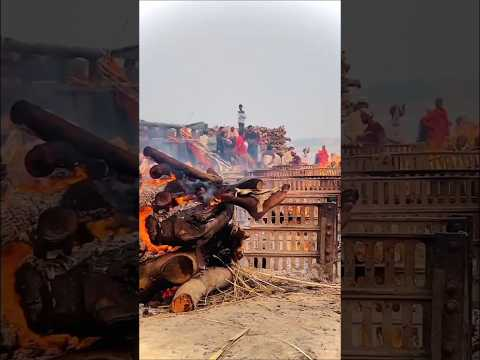


 2. अस्थि विसर्जन 💔🙏#manikarnikaghat#navratri#jaimatadi #varanasi#mahadev#travel#vir...
   👀 Views: 74,712,049 | 👍 Likes:  291,345
   🔗 https://www.youtube.com/watch?v=ADCW69GF1bg
   🖼️  Thumbnail:


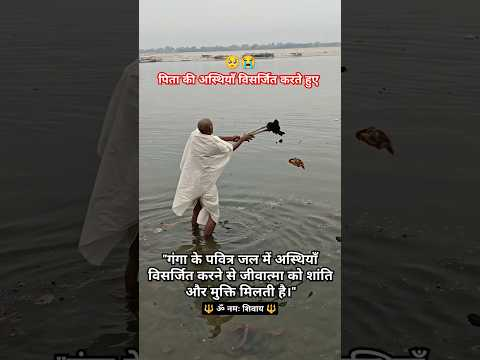


 3. 𝗩𝗮𝗿𝗮𝗻𝗮𝘀𝗶 में इस 😲जगह न चाकर भी जाओगे : 𝗠𝗮𝗻𝗶𝗸𝗮𝗿𝗻𝗶𝗸𝗮 𝗚𝗵𝗮𝘁 | #youtubeshorts #shorts...
   👀 Views: 27,783,574 | 👍 Likes: 1,186,408
   🔗 https://www.youtube.com/watch?v=WqERxfU0m4I
   🖼️  Thumbnail:


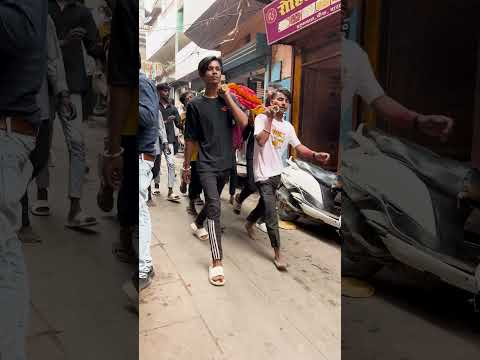


 4. इंशान का कोई मूल्य नहीं होता💯💔#manikarnikaghat#sanatandharma#mahadev#kashi#varan...
   👀 Views: 15,703,077 | 👍 Likes:   65,289
   🔗 https://www.youtube.com/watch?v=7V-l-aJFkgU

 5. shamshan #manikarnika#samshanghat #manikarnikaghat#mahakaleswar #varanasi#varana...
   👀 Views: 13,558,414 | 👍 Likes:        0
   🔗 https://www.youtube.com/watch?v=dC-1Ce87TgY

 6. 😔आत्मा को मुक्ति मिल गया। 💔 #manikarnikaghat #varanasi #kashi
   👀 Views: 9,490,837 | 👍 Likes:   98,425
   🔗 https://www.youtube.com/watch?v=xK2tXa3IMw8

 7. Raat ke 2 Baje Yeh hota hai Manikarnika Ghat Pey | Ashish Verma |
   👀 Views: 7,682,902 | 👍 Likes:  443,309
   🔗 https://www.youtube.com/watch?v=nOk660vXrUo

 8. pap ka prayaschit kar Lo Marne se pahle manikarnika Ghat shamshan Ghat Varanasi
   👀 Views: 6,125,203 | 👍 Likes:   72,023
   🔗 https://www.youtube.com/watch?v=ydneTNYdFsw

 9. Manikarnika Ghat ||#shorts #shortsfeed #varanasighat
   👀 Views: 3,844,275 | 👍 Likes:   88,490
   🔗 https://www.youtube.com/watch?v=ZHkVz

In [ ]:
# === STEP 1: MOUNT DRIVE (Run once per session) ===

# === STEP 2: LOAD YOUTUBE API KEY ===
api_key = "Your_youtube_API_key"

print("✅ API key loaded securely")

# === STEP 3: INSTALL & IMPORTS ===
!pip install google-api-python-client
from googleapiclient.discovery import build
import operator
from IPython.display import Image, display

# === MAIN FUNCTION ===
def get_top_videos(keywords, api_key, max_results=25):
    youtube = build('youtube', 'v3', developerKey=api_key)

    # Join keywords into search query
    query = ' '.join(keywords)
    print(f"🔍 Searching YouTube for: '{query}'")

    # Search for videos
    search_response = youtube.search().list(
        q=query,
        part='id,snippet',
        maxResults=max_results,
        type='video',
        order='relevance'
    ).execute()

    videos = []
    for item in search_response.get('items', []):
        video_id = item['id']['videoId']

        # Get video details (views, likes, thumbnails)
        stats_response = youtube.videos().list(
            part='statistics,snippet',
            id=video_id
        ).execute()

        if stats_response['items']:
            stats = stats_response['items'][0]['statistics']
            snippet = stats_response['items'][0]['snippet']

            # Get high-quality thumbnail
            thumbnail = snippet.get('thumbnails', {}).get('high', {}).get('url', '')

            views = int(stats.get('viewCount', 0))
            likes = int(stats.get('likeCount', 0))

            videos.append({
                'title': snippet['title'][:80] + '...' if len(snippet['title']) > 80 else snippet['title'],
                'url': f"https://www.youtube.com/watch?v={video_id}",
                'thumbnail': thumbnail,
                'views': views,
                'likes': likes,
                'score': views + likes * 2
            })

    # Sort by score and get top 10
    top_videos = sorted(videos, key=operator.itemgetter('score'), reverse=True)[:10]
    return top_videos

# === RUN IT ===
keywords = ['benaras','kashi','manikarnika', 'ghat','death']
top10 = get_top_videos(keywords, api_key)

print("\n🏆 TOP 10 VIDEOS (Sorted by Views + Likes):\n")

# === DISPLAY FIRST 3 WITH THUMBNAILS ===
for i, video in enumerate(top10[:3], 1):
    print(f"{i:2d}. {video['title']}")
    print(f"   👀 Views: {video['views']:>8,} | 👍 Likes: {video['likes']:>8,}")
    print(f"   🔗 {video['url']}")

    # Display thumbnail image
    if video['thumbnail']:
        print("   🖼️  Thumbnail:")
        display(Image(video['thumbnail'], width=320))
    print()

# === REST WITHOUT THUMBNAILS ===
for i, video in enumerate(top10[3:], 4):
    print(f"{i:2d}. {video['title']}")
    print(f"   👀 Views: {video['views']:>8,} | 👍 Likes: {video['likes']:>8,}")
    print(f"   🔗 {video['url']}\n")

**C2**

In [ ]:
# === 1. MOUNT & LOAD KEYS ===

yt_api_key = "your_youtube_api_key"
gemini_api_key = "Your_Google_Gemini_API_key"

# === 2. ONLY INSTALL WHAT WORKS ===
!pip install -q google-generativeai google-api-python-client

import google.generativeai as genai
from googleapiclient.discovery import build
import operator
from IPython.display import Image, display

genai.configure(api_key=gemini_api_key)

print("✅ All dependencies loaded!")


✅ All dependencies loaded!


/usr/local/lib/python3.12/dist-packages/google/colab/_import_hooks/_hook_injector.py:55: FutureWarning: 

All support for the `google.generativeai` package has ended. It will no longer be receiving 
updates or bug fixes. Please switch to the `google.genai` package as soon as possible.
See README for more details:

https://github.com/google-gemini/deprecated-generative-ai-python/blob/main/README.md

  loader.exec_module(module)


**C3**

**This cell lists all available Google Gemini API models that can be integrated into our application.**

In [ ]:
import google.generativeai as genai

# List all available models
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-2.5-flash
models/gemini-2.5-pro
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-exp-1206
models/gemini-2.5-flash-preview-tts
models/gemini-2.5-pro-preview-tts
models/gemma-3-1b-it
models/gemma-3-4b-it
models/gemma-3-12b-it
models/gemma-3-27b-it
models/gemma-3n-e4b-it
models/gemma-3n-e2b-it
models/gemini-flash-latest
models/gemini-flash-lite-latest
models/gemini-pro-latest
models/gemini-2.5-flash-lite
models/gemini-2.5-flash-image
models/gemini-2.5-flash-preview-09-2025
models/gemini-2.5-flash-lite-preview-09-2025
models/gemini-3-pro-preview
models/gemini-3-flash-preview
models/gemini-3-pro-image-preview
models/nano-banana-pro-preview
models/gemini-robotics-er-1.5-preview
models/gemini-2.5-computer-use-preview-10-2025
models/deep-research-pro-p

**C4**

Here we Store our Google Gemini API key in the variable **GEMINI_API_KEY**

In [ ]:
GEMINI_API_KEY = "Your_Google_Gemini_API_key"

**C5**

**This cell imports and configures the Gemini API client with the provided key, initializes the gemini-2.5-flash model, and runs a simple test prompt to verify text generation.**

In [ ]:
import google.generativeai as genai

genai.configure(api_key=GEMINI_API_KEY)


**C6**

In [ ]:
model = genai.GenerativeModel("models/gemini-2.5-flash")

**C7**

In [ ]:
response = model.generate_content("Say 2 sentences about Thalapathivijay")

print(response.text)

Thalapathy Vijay is a highly influential and celebrated Indian actor, primarily known for his remarkable career in Tamil cinema. He is widely recognized for his charismatic screen presence and numerous blockbuster films, and has recently announced his full-time entry into politics, marking a significant new chapter.


**C8**

In [ ]:
yt_api_key = "your_youtube_api_key"

**C9**

**Importing the libraries required for the subsequent code implementations.**

In [ ]:
from IPython.display import Image, display
import json
import math
import operator
from googleapiclient.discovery import build
import google.generativeai as genai

**C10**

###Cell Description: Symptom-to-Video Retrieval Pipeline
This cell defines the function *symptom_to_videos(user_symptoms)*, which implements a complete pipeline for converting user-provided medical symptoms into optimized YouTube video recommendations. The workflow integrates **keyword extraction via Gemini, YouTube Data API search**, and **ranking logic** to return the most relevant educational videos.

**Key Activities in the Cell**
1. Keyword Extraction & Optimization (Gemini Model)



*   A generative model (gemini-2.5-flash) is invoked with a structured prompt.
*   The model converts raw symptom text into 8–12 standardized medical keywords.
*   Constraints:
        
         a) No diagnosis or medication names
         b) Keywords must be educational/awareness-oriented.
         c) Neutral phrases such as “management”, “care”, and “awareness” are appended.

*   Extracted keywords are cleaned, normalized, and printed for verification.

2. **YouTube Search (YouTube Data API v3)**


*   The optimized keywords are concatenated into a query string.
*   A search request is executed (*youtube.search().list*) with parameters:

         a) q: keyword query
         b) part: id,snippet
         c) maxResults: 25
         d) type: video
         e) order: relevance
*   For each retrieved video, metadata and statistics are fetched (*youtube.videos().list*), including Title, thumbnail, view count, like count.
*   A scoring metric is computed:

        score = views + 2⋅likes
>This balances popularity (views) with engagement (likes).

**3. Ranking & Output**


*   Videos are sorted in descending order of the computed score.
*   The top 10 videos are selected.
*  The function returns:

         a)A list of video dictionaries (title, URL, thumbnail, views, likes, score).
         b)The optimized keyword set used for retrieval.

**Overall Functionality**

This cell operationalizes a **symptom-to-video recommendation system**. Given user symptoms, it:

1. Extracts medically relevant keywords using Gemini.

2. Queries YouTube for educational content aligned with those keywords.

3. Scores and ranks videos by engagement metrics.

4. Returns the top 10 most relevant videos along with the keyword set.

This ensures that the pipeline produces **awareness-focused**, **non-diagnostic video recommendations** tailored to user symptoms.

In [ ]:
def symptom_to_videos(user_symptoms):
    """Full pipeline: symptoms → optimized keywords → top YouTube videos"""

    # STEP 1: Gemini extracts + optimizes medical keywords
    model = genai.GenerativeModel("models/gemini-2.5-flash")
    prompt = f"""
You are a medical text keyword extraction system.
You are NOT a doctor.

Task:
- Convert user symptoms into YouTube SEARCH KEYWORDS
- NO diagnosis
- NO medicine names
- Educational & awareness only

Rules:
1. Use standard medical terminology
2. Add neutral phrases: "management", "care", "awareness"

Output format:
- Return ONLY 8-12 keywords, comma separated

User symptoms:
{user_symptoms}
"""

    response = model.generate_content(prompt)
    keywords = [k.strip() for k in response.text.strip().split(',') if k.strip()]

    print(f"🎯 Optimized keywords: {' | '.join(keywords[:10])}")

    # STEP 2: Your existing YouTube search (unchanged)
    youtube = build('youtube', 'v3', developerKey=yt_api_key)
    query = ' '.join(keywords)

    search_response = youtube.search().list(
        q=query, part='id,snippet', maxResults=25, type='video', order='relevance'
    ).execute()

    videos = []
    for item in search_response.get('items', []):
        video_id = item['id']['videoId']
        stats_response = youtube.videos().list(part='statistics,snippet', id=video_id).execute()

        if stats_response['items']:
            stats = stats_response['items'][0]['statistics']
            snippet = stats_response['items'][0]['snippet']
            thumbnail = snippet.get('thumbnails', {}).get('medium', {}).get('url', '')

            videos.append({
                'title': snippet['title'][:70] + '...',
                'url': f"https://www.youtube.com/watch?v={video_id}",
                'thumbnail': thumbnail,
                'views': int(stats.get('viewCount', 0)),
                'likes': int(stats.get('likeCount', 0)),
                'score': int(stats.get('viewCount', 0)) + int(stats.get('likeCount', 0)) * 2
            })

    # STEP 3: Sort & return top 10
    top_videos = sorted(videos, key=operator.itemgetter('score'), reverse=True)[:10]
    return top_videos, keywords




**C11**

**This cell tests the workflow: user symptom input → keyword extraction → keyword feeding → video retrieval.**

**[The operation executes successfully.]**


Enter your symptoms: my head is paining
🎯 Optimized keywords: Headache | Cephalgia | Head pain | Causes of headache | Headache symptoms | Headache management | Headache care | Headache awareness | Understanding headaches

1. What causes headaches? - Dan Kwartler...
   Views: 7,328,573 | Likes: 163,729
   https://www.youtube.com/watch?v=KpHP8VmxnBo


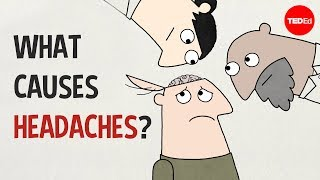


2. Which Headache Do You Have? 😣 Tension, Migraine, or Something Serious?...
   Views: 5,960,033 | Likes: 18,211
   https://www.youtube.com/watch?v=MPfvJqd4Dnc


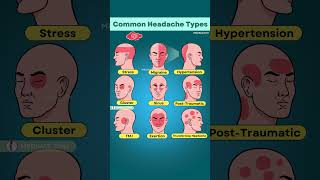


3. How to Fix a Headache in Seconds #Shorts...
   Views: 3,953,479 | Likes: 110,616
   https://www.youtube.com/watch?v=cMThkDoozj0


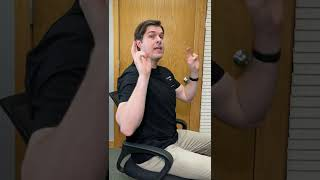


4. What happens to your brain during a migraine - Marianne Schwarz...
   Views: 3,945,971 | Likes: 97,388
   https://www.youtube.com/watch?v=qwZypa0iKq8


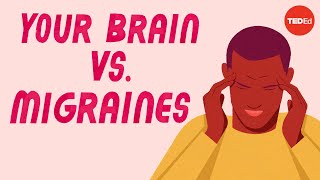


5. Headache - Overview (types, signs and symptoms, treatment)...
   Views: 1,584,868 | Likes: 19,109
   https://www.youtube.com/watch?v=JMfmDAJo3qc


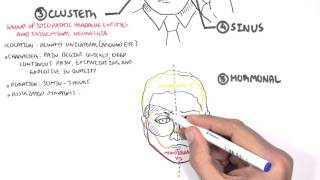


6. Different Types of Headaches...
   Views: 1,294,190 | Likes: 8,732
   https://www.youtube.com/watch?v=IliD2djldFY


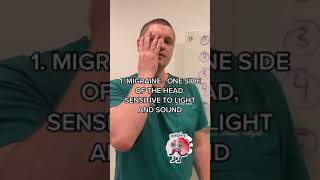


7. Migraine: A Neurological Condition That's Not Just in Your Head - Yale...
   Views: 1,262,935 | Likes: 10,993
   https://www.youtube.com/watch?v=oBvGbn1MuPU


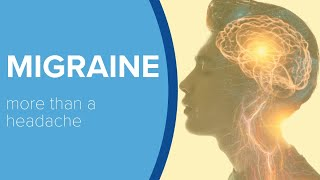


8. Headache 💢 at the top of your head? Let's get rid of it!...
   Views: 888,428 | Likes: 12,037
   https://www.youtube.com/watch?v=rgTeGjLoKRE


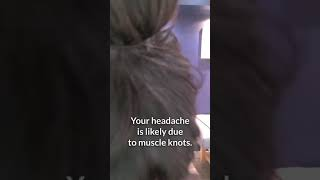


9. What Is a Migraine? | Symptoms of Migraine Headache #shorts #migrane #...
   Views: 844,421 | Likes: 13,135
   https://www.youtube.com/watch?v=THe24dgA1WM


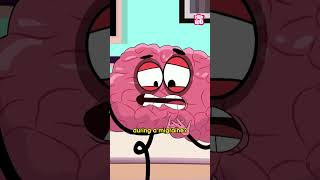


10. Different Types of Headaches & What They Mean | Causes & Relief...
   Views: 596,691 | Likes: 3,011
   https://www.youtube.com/watch?v=REgf_CVc2GU


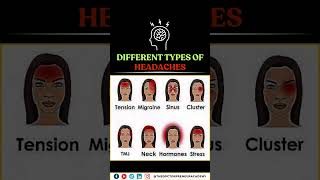

In [ ]:
# === TEST IT ===
user_input = input("Enter your symptoms: ")
videos, keywords = symptom_to_videos(user_input)
# Display results (your existing display code)
for i, video in enumerate(videos[:10], 1):
    print(f"\n{i}. {video['title']}")
    print(f"   Views: {video['views']:,} | Likes: {video['likes']:,}")
    print(f"   {video['url']}")
    if video['thumbnail']: display(Image(video['thumbnail'], width=300))


**C12**

**Loading the API Key of Google Places(New) API**

In [ ]:
GOOGLE_MAPS_API_KEY = "your_google_maps_API_key"
print("✅ API key loaded")

✅ API key loaded


**C13**

**The next three cells are dedicated to installing the required libraries. Each installation is executed in a separate cell to improve debugging efficiency, facilitate tracking of potential dependency conflicts, and precisely identify the point of failure, if any.**

In [ ]:
!pip install sentence_transformers

**C14**

In [ ]:
!pip install requests

**C15**

In [ ]:
!pip install folium

**C16**

**Cell Description: Nearby Medical Care Finder**
This cell implements a **symptom-driven medical facility** recommender using the Google Places API and semantic embeddings. It defines:

CarePlace **dataclass** – structured representation of a medical facility (name, address, rating, distance, keywords, etc.).

NearbyMedicalFinder **class** – core logic for:

1. Mapping symptoms to medical specialties (generate_medical_queries).

2. Embedding text for similarity scoring (embed_text).

3. Geocoding addresses (geocode_address).

4. Retrieving candidate facilities via Places Text Search + Nearby Search (find_nearby_places_new).

5. Scoring and ranking results by distance, relevance, and ratings (score_places).

6. Auto-detecting user location (get_live_location).

7. Calculating geodesic distance (haversine).

8. Main entry point for recommendations (recommend_care).

**Overall:** Given symptoms and location, the cell queries Google Places, scores facilities by proximity and relevance, and returns the top-ranked medical care options.

In [ ]:

import requests
import json
import numpy as np
from sentence_transformers import SentenceTransformer
from typing import List, Dict, Any
from dataclasses import dataclass
from datetime import datetime


# Load embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')


@dataclass
class CarePlace:
    name: str
    address: str
    rating: float
    user_ratings_total: int
    distance_m: float
    match_percent: float
    place_id: str
    url: str
    lat: float
    lng: float
    matched_keywords: List[str]


class NearbyMedicalFinder:
    def __init__(self, api_key: str):
        self.api_key = api_key
        self.symptom_embedding = None


    def generate_medical_queries(self, symptoms: List[str]) -> List[str]:
        """Map symptoms to medical specialty queries"""
        symptom_text = " ".join(symptoms).lower()
        specialty_map = {
            "headache": ["neurologist", "headache clinic"],
            "chest": ["cardiologist", "cardiac clinic"],
            "pain chest": ["cardiologist", "cardiac clinic"],
            "skin": ["dermatologist", "skin clinic"],
            "fever": ["general physician", "clinic"],
            "back pain": ["orthopedic", "physiotherapy"],
            "stomach": ["gastroenterologist", "stomach clinic"],
            "eye": ["ophthalmologist", "eye clinic"]
        }
        queries = []
        for symptom in symptoms:
            symptom_lower = symptom.lower()
            for key, vals in specialty_map.items():
                if key in symptom_lower:
                    queries.extend(vals)
        if not queries:
            queries = ["general physician", "clinic", "hospital"]
        return list(set(queries[:5]))  # max 5 queries


    def embed_text(self, text: str) -> np.ndarray:
        return model.encode(text)


    def geocode_address(self, address: str) -> tuple:
        """Convert address to lat/lng using Geocoding API"""
        url = "https://maps.googleapis.com/maps/api/geocode/json"
        params = {
            "address": address,
            "key": self.api_key
        }
        try:
            response = requests.get(url, params=params)
            data = response.json()
            if data["status"] == "OK" and data["results"]:
                loc = data["results"][0]["geometry"]["location"]
                return loc["lat"], loc["lng"]
        except:
            pass
        return 23.5224, 87.3233  # Durgapur default


    # JUST REPLACE the find_nearby_places_new method with this:
    def find_nearby_places_new(self, lat: float, lng: float, queries: List[str],
                              radius: int = 5000) -> List[Dict]:
        """Places API (New) - Text Search + Nearby Search combo"""
        all_places = []


        # TEXT SEARCH endpoint for specialty queries
        text_url = "https://places.googleapis.com/v1/places:searchText"
        nearby_url = "https://places.googleapis.com/v1/places:searchNearby"


        headers = {
            "Content-Type": "application/json",
            "X-Goog-Api-Key": self.api_key,
            "X-Goog-FieldMask": "places.id,places.displayName,places.location,places.types,places.rating,places.userRatingCount,places.formattedAddress"
        }


        # 1. TEXT SEARCH for specialty (e.g. "cardiologist")
        for query in queries[:3]:  # Limit to top 3
            text_payload = {
                "textQuery": f"{query}",  # Add location context
                "locationBias": {
                    "circle": {
                        "center": {"latitude": lat, "longitude": lng},
                        "radius": radius
                    }
                },
                "maxResultCount": 10
            }
            try:
                response = requests.post(text_url, headers=headers, json=text_payload)
                if response.status_code == 200:
                    data = response.json()
                    all_places.extend(data.get("places", []))
                    print(f"✅ TextSearch: {len(data.get('places', []))} for '{query}'")
            except Exception as e:
                print(f"❌ TextSearch error: {e}")


        # 2. NEARBY SEARCH for general medical places
        nearby_payload = {
            "includedTypes": ["hospital", "doctor", "pharmacy"],
            "maxResultCount": 10,
            "locationRestriction": {
                "circle": {
                    "center": {"latitude": lat, "longitude": lng},
                    "radius": radius
                }
            }
        }
        try:
            response = requests.post(nearby_url, headers=headers, json=nearby_payload)
            if response.status_code == 200:
                data = response.json()
                all_places.extend(data.get("places", []))
                print(f"✅ NearbySearch: {len(data.get('places', []))} medical places")
        except Exception as e:
            print(f"❌ NearbySearch error: {e}")


        # Dedupe and convert format
        seen_ids = set()
        legacy_places = []
        for place in all_places:
            if place["id"] not in seen_ids:
                seen_ids.add(place["id"])
                legacy_place = {
                    "place_id": place["id"],
                    "name": place["displayName"]["text"],
                    "geometry": {
                        "location": {
                            "lat": place["location"]["latitude"],
                            "lng": place["location"]["longitude"]
                        }
                    },
                    "types": place.get("types", []),
                    "rating": place.get("rating", 0),
                    "user_ratings_total": place.get("userRatingCount", 0),
                    "vicinity": place.get("formattedAddress", "")
                }
                legacy_places.append(legacy_place)


        return legacy_places[:20]  # Max 20 unique places



    def score_places(self, places: List[Dict], symptom_text: str, lat: float, lng: float) -> List[CarePlace]:
      """Sort by DISTANCE first, then relevance boost"""
      self.symptom_embedding = self.embed_text(symptom_text)
      queries = self.generate_medical_queries([symptom_text])

      scored_places = []
      for place in places:
          place_loc = place.get("geometry", {}).get("location", {})
          if not place_loc:
              continue

          distance = self.haversine(lat, lng, place_loc["lat"], place_loc["lng"])

          # Place text for relevance scoring
          place_text = f"{place.get('name', '')} {' '.join(place.get('types', []))}"

          # Keyword matches (e.g. "cardiology" in name/types)
          keyword_boost = sum(1 for q in queries if q.lower() in place_text.lower())

          # Text similarity
          place_embedding = self.embed_text(place_text)
          sim = np.dot(self.symptom_embedding, place_embedding) / (
              np.linalg.norm(self.symptom_embedding) * np.linalg.norm(place_embedding)
          )

          # Rating normalization
          rating_norm = min(place.get("rating", 0) / 5.0, 1.0)

          # RELEVANCE SCORE (0-100%) - ignores distance for sorting
          relevance_score = 50 * sim + 30 * rating_norm + 20 * keyword_boost
          match_pct = max(0, min(100, relevance_score))

          matched_keywords = [q for q in queries if q.lower() in place_text.lower()]

          care_place = CarePlace(
              name=place.get("name", "Unknown"),
              address=place.get("vicinity", ""),
              rating=place.get("rating", 0),
              user_ratings_total=place.get("user_ratings_total", 0),
              distance_m=round(distance),
              match_percent=round(match_pct, 1),
              place_id=place["place_id"],
              url=f"https://www.google.com/maps/place/?q=place_id:{place['place_id']}",
              lat=place_loc["lat"],
              lng=place_loc["lng"],
              matched_keywords=matched_keywords[:3]
          )
          scored_places.append(care_place)

      # ✅ KEY FIX: Sort by DISTANCE first, then relevance
      return sorted(scored_places, key=lambda p: (p.distance_m, -p.match_percent))[:10]



    def get_live_location(self) -> tuple:
      """Get approximate location from IP - works everywhere"""
      try:
          # Free IP geolocation (no API key needed)
          response = requests.get('https://ipinfo.io/json')
          data = response.json()
          loc = data['loc'].split(',')
          lat, lng = float(loc[0]), float(loc[1])
          print(f"📍 Auto-detected: {data.get('city', 'Unknown')}")
          return lat, lng
      except:
          # Fallback to Durgapur
          print("📍 Using Durgapur default")
          return 23.5224, 87.3233


    def haversine(self, lat1, lon1, lat2, lon2):
        R = 6371000
        phi1, phi2 = np.radians(lat1), np.radians(lat2)
        dphi, dlambda = np.radians(lat2-lat1), np.radians(lon2-lon1)
        a = np.sin(dphi/2)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(dlambda/2)**2
        return 2 * R * np.arcsin(np.sqrt(a))


    def recommend_care(self, symptoms: List[str], lat: float = None, lng: float = None,
                      address: str = None, radius: int = 50000) -> List[CarePlace]:
        """Main entry point - FIXED"""
        # Fix #1: Handle address geocoding properly
        if address and (lat is None or lng is None):
            lat, lng = self.geocode_address(address)

        # Validate coordinates
        if lat is None or lng is None:
            lat, lng = 0, 0  # Durgapur default

        symptom_text = " ".join(symptoms)
        queries = self.generate_medical_queries(symptoms)

        print(f"🔍 Symptom text: {symptom_text}")
        print(f"📍 Using location: {lat}, {lng}")
        print(f"🔑 Generated queries: {queries}")

        # Fix #2: Pass radius to places search + ALWAYS score
        places = self.find_nearby_places_new(lat, lng, queries, radius)
        scored = self.score_places(places, symptom_text, lat, lng)  # UNCOMMENTED

        print(f"✅ Found {len(scored)} scored recommendations")
        return scored



print("✅ MedicalFinder class loaded!")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: d09c9424-c0c2-4cad-8bed-66bed82732e7)')' thrown while requesting HEAD https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2/resolve/main/tokenizer.json
Retrying in 1s [Retry 1/5].


tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

✅ MedicalFinder class loaded!


**C17**

**Loading the API Key of Google Places(New) API**

In [ ]:
# Paste your Places API (New) key here
GOOGLE_MAPS_API_KEY = "your_google_maps_API_key"  # ← Replace with your actual key

print("✅ API key loaded!")


✅ API key loaded!


**C18**

**This cell exhibited suboptimal performance, as only a single clinic was extracted from the provided symptoms.**

**Consequently, modifications were introduced in the subsequent cell, which executed successfully.**

In [ ]:
# # Initialize
finder = NearbyMedicalFinder(GOOGLE_MAPS_API_KEY)

lati, longi = finder.get_live_location()
print(f"Using live coords: {lati}, {longi}")


# Test 1: Direct coordinates (Durgapur)
symptoms1 = ["chest pain", "shortness of breath"]
results1 = finder.recommend_care(symptoms1, lat=lati, lng=longi)

print("\n🏥" + "="*50)
print("TEST 1: Chest pain recommendations")
for i, place in enumerate(results1[:5], 1):
    print(f"{i}. {place.name}")
    print(f"   📊 {place.match_percent}% | {place.distance_m}m | ⭐{place.rating}")
    print(f"   📍 {place.address}")
    print(f"   🔗 {place.url}")
    print()






📍 Auto-detected: Singapore
Using live coords: 1.2897, 103.8501
🔍 Symptom text: chest pain shortness of breath
📍 Using location: 1.2897, 103.8501
🔑 Generated queries: ['cardiologist', 'cardiac clinic']
✅ TextSearch: 10 for 'cardiologist'
✅ TextSearch: 10 for 'cardiac clinic'
✅ NearbySearch: 10 medical places
✅ Found 10 scored recommendations

🏥==================================================
TEST 1: Chest pain recommendations
1. Raffles Heart Centre
   📊 32.29999923706055% | 1454m | ⭐4.5
   📍 585 N Bridge Rd, Level 10 Raffles Specialist Centre, Singapore 188770
   🔗 https://www.google.com/maps/place/?q=place_id:ChIJkZGimrAZ2jER07hiKql9Qeo

2. Healthy Heart Specialist Centre
   📊 33.0% | 1839m | ⭐4
   📍 111 Somerset Road Units 03-21 to 03-24, TripleOne Somerset, Singapore 238164
   🔗 https://www.google.com/maps/place/?q=place_id:ChIJ0_OGndwZ2jERQnV0TVbuogY

3. EH Heart Specialist Clinic – Cardiologist
   📊 58.599998474121094% | 2328m | ⭐4.9
   📍 3 Mount Elizabeth, #03-09, Singapore 228

**C19**

**This cell is designed to validate the correct execution of the Places retrieval operation by evaluating specific test conditions (symptoms).**

In [ ]:
# Test with natural sorting
symptoms = ["chest pain", "shortness of breath"]
finder = NearbyMedicalFinder(GOOGLE_MAPS_API_KEY)
results = finder.recommend_care(symptoms, lat=41.2619, lng=-95.8608)  # 50km search

print("\n🏥 TOP 10 NEAREST MEDICAL FACILITIES:")
print("=" * 70)
for i, place in enumerate(results, 1):
    dist_km = place.distance_m / 1000
    print(f"{i}. {place.name}")
    print(f"   📊 {place.match_percent}% | {dist_km:.1f}km ({place.distance_m}m)")
    print(f"   ⭐ {place.rating} | {place.address}")
    print(f"   Keywords: {', '.join(place.matched_keywords) or 'General care'}")
    print()


🔍 Symptom text: chest pain shortness of breath
📍 Using location: 41.2619, -95.8608
🔑 Generated queries: ['cardiologist', 'cardiac clinic']
✅ TextSearch: 10 for 'cardiologist'
✅ TextSearch: 10 for 'cardiac clinic'
✅ NearbySearch: 10 medical places
✅ Found 10 scored recommendations

🏥 TOP 10 NEAREST MEDICAL FACILITIES:
1. CHI Health Clinic Heart Institute (Mercy Council Bluffs)
   📊 38.70000076293945% | 2.0km (1970m)
   ⭐ 5 | 800 Mercy Dr, Council Bluffs, IA 51503, USA
   Keywords: General care

2. Iowa Heart Center
   📊 11.899999618530273% | 2.2km (2181m)
   ⭐ 1 | 1 Edmundson Pl # 306, Council Bluffs, IA 51503, USA
   Keywords: General care

3. Robert W. Armbruster, MD
   📊 33.70000076293945% | 2.2km (2250m)
   ⭐ 5 | 1 Edmundson Pl, Council Bluffs, IA 51503, USA
   Keywords: General care

4. CHI Health Clinic Heart Institute (University Campus)
   📊 5.900000095367432% | 7.4km (7377m)
   ⭐ 0 | 2412 Cuming St Ste 200, Omaha, NE 68131, USA
   Keywords: General care

5. University of Nebras

###Evaluation & Analysis

**a. Metrics Used (Quantitative and Qualitative)**

The system is evaluated using a combination of qualitative and task-oriented metrics. Qualitative evaluation focuses on the correctness and relevance of extracted medical keywords and recommended medical specialties. Task success rate is used to assess whether the system correctly maps user-described symptoms to appropriate clinical domains and nearby healthcare facilities. Response coherence and contextual accuracy are also evaluated through manual inspection.

**b. Sample Outputs / Predictions**

Given a natural language input such as a user describing pain intensity, affected body part, and duration, the system successfully extracts relevant symptom entities and maps them to suitable medical specialties. Based on this interpretation, it generates a ranked list of nearby clinics along with their geographic visualization on a map. The outputs demonstrate the system’s ability to bridge unstructured human language with structured medical and location-based information.

**c. Performance Analysis and Limitations**

The system performs reliably for common and clearly described symptoms, producing contextually accurate recommendations. However, performance may degrade for highly ambiguous, rare, or multi-condition symptom descriptions. The system is also dependent on the quality and coverage of external APIs, which may affect clinic availability and accuracy in certain geographic regions.

###Ethical Considerations & Responsible AI
**a. Bias and Fairness Considerations**

Efforts are made to minimize bias by avoiding assumptions related to age, gender, or socioeconomic background. The system does not prioritize or suppress recommendations based on sensitive personal attributes and treats all user inputs uniformly based on symptom relevance alone.

**b. Dataset Limitations**

The medical knowledge used by the system is limited to publicly available resources and curated mappings, which may not cover all rare or region-specific medical conditions. Additionally, clinic data retrieved via APIs may not always reflect real-time availability or service quality.

**c. Responsible Use of AI Tools**

The system is designed strictly as a decision-support tool and not as a replacement for professional medical diagnosis. Clear boundaries are maintained to ensure users are encouraged to consult qualified healthcare professionals. No personal health data is permanently stored, ensuring user privacy and data protection.


###Conclusion & Future Scope
**a. Summary of Results**

This project demonstrates the effective use of Natural Language Processing and AI techniques to convert user-friendly symptom descriptions into actionable healthcare guidance. By integrating language understanding with location-based services, the system significantly reduces the effort required to identify relevant medical assistance.

**b. Possible Improvements and Extensions**

Future enhancements may include multilingual support, integration of real-time appointment availability, incorporation of feedback-based learning, and improved handling of complex or overlapping medical conditions. Extending the system with advanced clinical decision support and personalization features could further improve accuracy and user trust.